# TITANIC dataset analysis

#### Source: [*Titanic: Machine Learning from Disaster*, kaggle](https://www.kaggle.com/c/titanic/data)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbs
from matplotlib import pyplot as plt

In [2]:
filename = "../data/titanic_data.csv"

dtypes = {'PassengerId': np.int32, 'Survived': 'bool', 'Pclass': 'category', 'SibSp': np.int32, 'Parch': np.int32}
titanic = pd.read_csv(filename, dtype=dtypes, index_col='PassengerId')


In [3]:
print(titanic.info())

titanic

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    bool    
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int32   
 6   Parch     891 non-null    int32   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: bool(1), category(1), float64(2), int32(2), object(5)
memory usage: 64.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Dataset description

### Data Dictionary
Variable	|    Definition	   |    Key
:---------: | :--------------: | :---------:
survival    | Survival	       | 0 = No, 1 = Yes
pclass  	| Ticket class	   | 1 = 1st, 2 = 2nd, 3 = 3rd
sex		    | Sex 
Age	        | Age in years	
sibsp	    | # of siblings / spouses aboard the Titanic
parch	    | # of parents / children aboard the Titanic
ticket	    | Ticket number	
fare	    | Passenger fare	
cabin	    | Cabin number	
embarked	| Port of Embarkation	| 	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes
#### pclass: A proxy for socio-economic status (SES)
1st = Upper  
2nd = Middle  
3rd = Lower

#### age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

#### parch: The dataset defines family relations in this way...
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

# Data wrangling

Documentation of any changes that were made to clean the data, such as merging multiple files, handling missing values, etc.

### Importing the dataset

The dataset was formatted as a csv file and thus imported using Pandas `read_csv()` function, with the following options:

- `dtype={'PassengerId': np.int32, 'Survived': 'bool', 'Pclass': 'category', 'SibSp': np.int32, 'Parch': np.int32}`. We note here that Pclass was imported as a Pandas 'category' to avoid interprating as float when plotting

- `index_col='PassengedId'`, to use the passenger Ids as the index of the resulting DataFrame

### Change 1
An additional column 'Age group' was added to the DataFrame to enable categorization of passengers by age groups: 0-4, 5-9, etc.

This was achieved using Pandas `cut()` function

In [4]:
labels = ["{0} - {1}".format(i, i + 4) for i in range(0, 100, 5)]

titanic['Age group'] = pd.cut(titanic['Age'], range(0, 101, 5), right=False, labels=labels)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group
PassengerId,,,,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20 - 24
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35 - 39
3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25 - 29
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35 - 39
5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...
887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,25 - 29
888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,15 - 19
889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


# Questions posed



## Q1a: What is the distribution of survivors over cabin classes?

<AxesSubplot:title={'center':'Distribution of survivors over cabin classes'}, xlabel='Cabin class', ylabel='No. of survivors'>

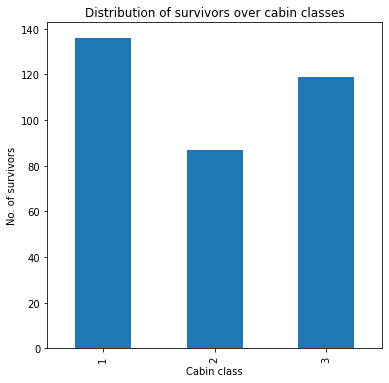

In [5]:
survivors = titanic.groupby('Pclass')['Survived'].sum()

survivors.plot(kind='bar', figsize=(6, 6), title='Distribution of survivors over cabin classes', \
               xlabel='Cabin class', ylabel='No. of survivors')


## Q2a: What is the distribution of survivors over gender?

<AxesSubplot:title={'center':'Distribution of survivors over gender'}, xlabel='Gender', ylabel='No. of survivors'>

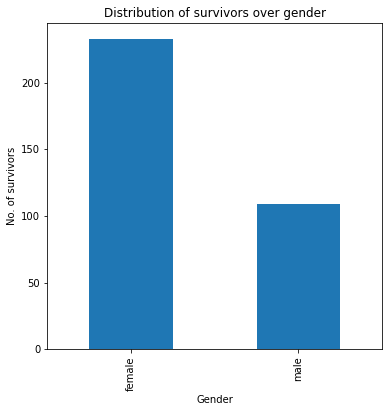

In [6]:
survivors = titanic.groupby('Sex')['Survived'].sum()

survivors.plot(kind='bar', figsize=(6, 6), title='Distribution of survivors over gender', \
              xlabel='Gender', ylabel='No. of survivors')


## Q3a: What is the distribution of survivors over age?

<AxesSubplot:title={'center':'Distribution of survivors over age'}, xlabel='Age group', ylabel='No. of survivors'>

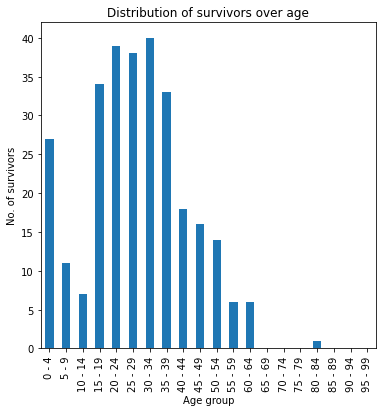

In [7]:
survivors = titanic.groupby('Age group')['Survived'].sum()

# print(survivors)

survivors.plot(kind='bar', figsize=(6, 6), title='Distribution of survivors over age', ylabel='No. of survivors')


## Q4a: What is the distribution of survivors over gender and cabin class?

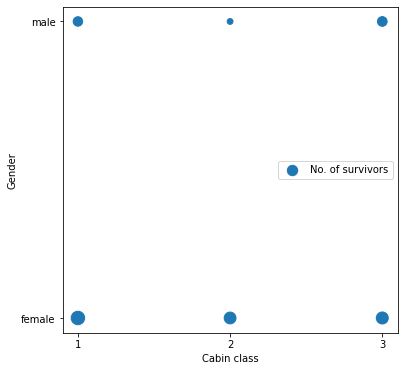

In [8]:
survivors = titanic.groupby(['Pclass', 'Sex'], as_index=False)['Survived'].sum()

plt.figure(figsize=(6, 6))

plt.scatter(x=survivors['Pclass'], y=survivors['Sex'], s=survivors['Survived']*2, label="No. of survivors")
plt.xlabel('Cabin class')
plt.ylabel('Gender')
plt.legend()


# Data exploration and analysis

#### Requirements
- The project investigates the stated question(s) from multiple angles.

- At least one dependent variable and three independent variables are investigated using both single-variable (1d) and
multiple-variable (2d) explorations.

- Relevant statistics are computed throughout the analysis when an inference is made about the data.

- The project's visualizations are varied and show multiple comparisons and trends. 

- At least two kinds of plots should be created as part of the explorations.

- Visualizations depict the data in an appropriate manner that allows plots to be readily interpreted.

## Q1b: What is the percentage of survivors over cabin classes?

<AxesSubplot:title={'center':'Percentage of survivors over cabin classes'}, xlabel='Cabin class', ylabel='Percentage survived'>

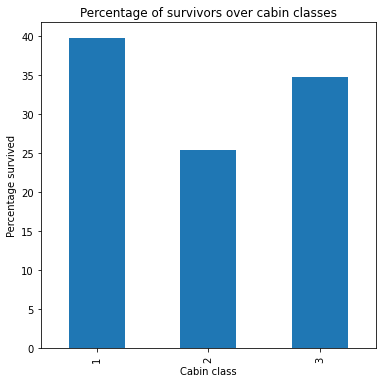

In [9]:
survivors_total = titanic['Survived'].sum()

survivors = (titanic.groupby('Pclass')['Survived'].sum() / survivors_total) * 100


survivors.plot(kind='bar', figsize=(6, 6), title='Percentage of survivors over cabin classes', \
               xlabel='Cabin class', ylabel='Percentage survived')


## Q2b: What is the percentage of survivors over gender?

<AxesSubplot:title={'center':'Percentage of survivors over gender'}, xlabel='Gender', ylabel='Percentage survived'>

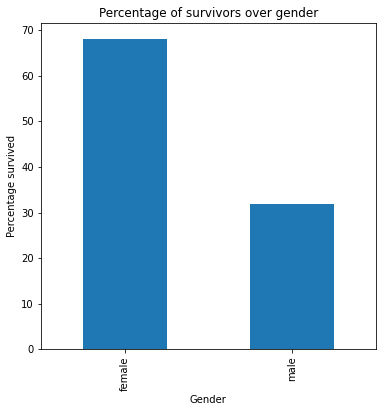

In [10]:
survivors_total = titanic['Survived'].sum()

survivors = (titanic.groupby('Sex')['Survived'].sum() / survivors_total) * 100

survivors.plot(kind='bar', figsize=(6, 6), title='Percentage of survivors over gender', \
              xlabel='Gender', ylabel='Percentage survived')


## Q3b: What is the percentage of survivors over age?

<AxesSubplot:title={'center':'Distribution of survivors over age'}, xlabel='Age group', ylabel='Percentage survived'>

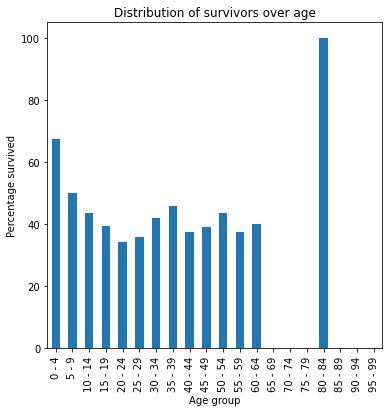

In [29]:
by_age = titanic.groupby('Age group')

by_age_totals = by_age['Survived'].count()

survivors = (by_age['Survived'].sum() / by_age_totals) * 100

survivors.plot(kind='bar', figsize=(6, 6), title='Distribution of survivors over age', ylabel='Percentage survived')


## Q4b: What is the percentage of survivors over gender and cabin class?

  Pclass     Sex  Survived
0      1  female        91
1      1    male        45
2      2  female        70
3      2    male        17
4      3  female        72
5      3    male        47


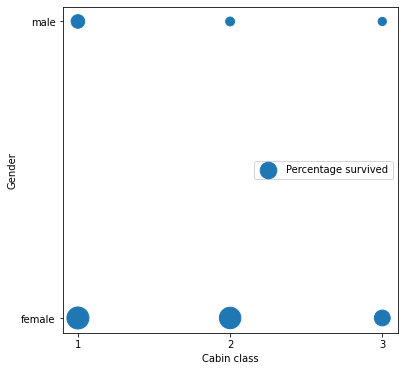

In [94]:
grouped = titanic[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False)

total_per_group = grouped.count()
survivors_per_group = grouped.sum()

percentages = (survivors_per_group['Survived'] / total_per_group['Survived']) * 100

print(survivors_per_group)

plt.figure(figsize=(6, 6))

plt.scatter(x=survivors_per_group['Pclass'], y=survivors_per_group['Sex'], s=percentages*5, label="Percentage survived")
plt.xlabel('Cabin class')
plt.ylabel('Gender')
plt.legend()


# Conclusions

#### Requirements
The results of the analysis are presented such that any limitations are clear. The analysis does not state or imply that one change causes another based solely on a correlation.

### Conclusions

1. The percentage of females survived was double the percentage of males  

2. The percentage of male survivors for cabin class 2 was significantly lower than classes 1 and 3

3. The percentage of kids under the age of 10 survived was significantly higher than other age groups